In [145]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.impute import SimpleImputer

In [147]:
df = pd.read_csv("Dataset.csv")
# df

In [148]:
pd.set_option('display.max_columns', df.shape[1])

In [149]:
# df.info()
df.describe()

,Unnamed: 0,Id,year,price,distance_travelled(kms),brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
count,1725.000000,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,862.000000,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275,0.269565,0.209275,1.416237e-06,0.000041,inf,0.187810,0.084623,0.013809,0.177658,88.962902,32.537208
std,498.108924,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504,0.443863,0.406909,1.291449e-06,0.000110,NaN,0.254849,0.081060,0.038689,0.258034,188.950690,158.662274
min,0.000000,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000,0.000000,0.000000,6.802721e-08,0.000001,0.032258,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000
25%,431.000000,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000,0.000000,0.000000,5.479452e-07,0.000014,0.125000,0.041667,0.030123,0.004524,0.029687,14.237358,0.000000
50%,862.000000,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000,0.000000,0.000000,1.142857e-06,0.000020,0.200000,0.071429,0.067464,0.006703,0.059821,36.716166,0.000000
75%,1293.000000,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000,1.000000,0.000000,1.834862e-06,0.000034,0.333333,0.200000,0.110899,0.011631,0.190000,90.776658,0.000000
max,1724.000000,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000,1.000000,1.000000,1.600000e-05,0.002857,inf,1.000000,1.000000,1.000000,1.000000,2477.517640,2477.517640


In [150]:
# checking for nulls in each column
df.isnull().sum()

Unnamed: 0                   0
Id                           0
year                         0
brand                        0
full_model_name              0
model_name                   0
price                        0
distance_travelled(kms)      0
fuel_type                    0
city                         0
brand_rank                   0
car_age                      0
distance below 30k km        0
new and less used            0
inv_car_price                0
inv_car_dist                 0
inv_car_age                  0
inv_brand                    0
std_invprice                 0
std_invdistance_travelled    0
std_invrank                  0
best_buy1                    0
best_buy2                    0
dtype: int64

In [151]:
# drop some repeating cols
df = df.drop(['Unnamed: 0', 'Id'], axis=1)
# df.columns
df.head(0)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2


In [152]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    # sns.heatmap(corr, annot=True, cmap=cmap)
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

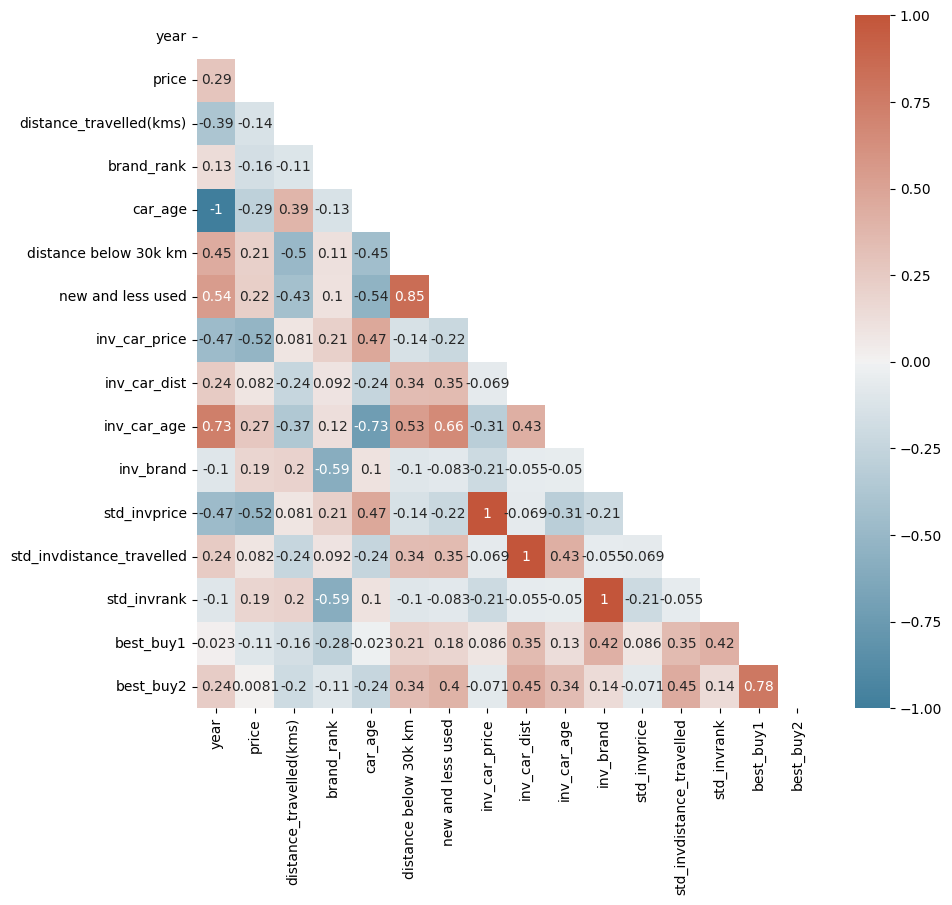

In [153]:
# get_heat_map_corr of df without column of object dtype
get_heat_map_corr(df)

In [154]:
# make label columns with object dtype
label = LabelEncoder()

cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode

df_tmp = df[:]
for c in cols_to_encode:
    label.fit(df_tmp[c].drop_duplicates())
    df_tmp[c] = label.transform(df_tmp[c])
    # print(c, df_tmp[c].isnull().sum())

df_tmp.head(2)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,2016,7,131,28,425000.0,9680.0,3,9,7,5.0,1,0,0.000002,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.0
1,2012,23,570,129,325000.0,119120.0,1,9,11,9.0,0,0,0.000003,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.0


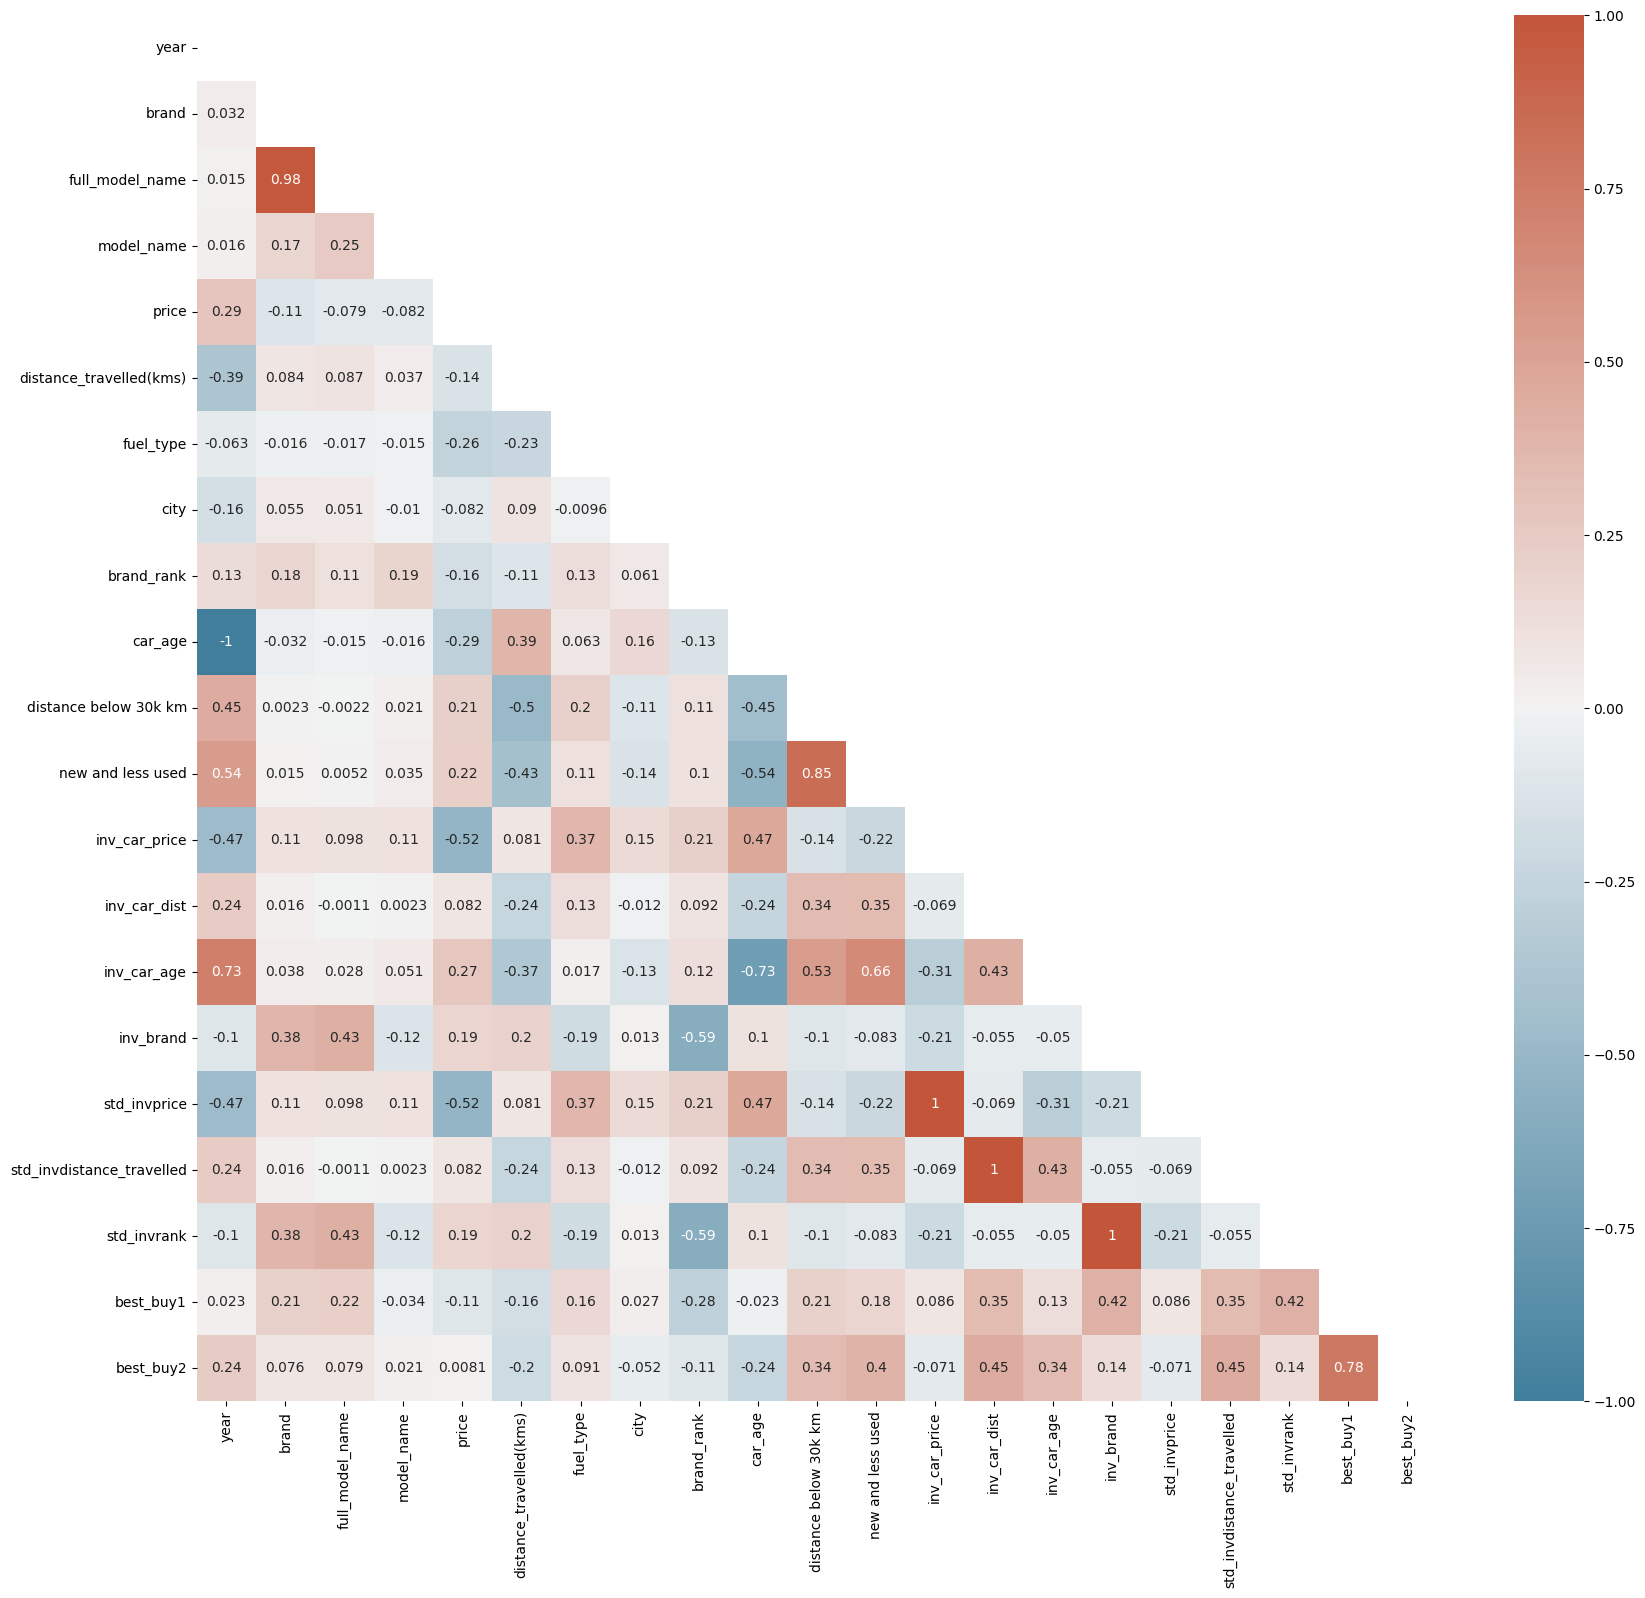

In [155]:
# plot data with labeled columns
get_heat_map_corr( df_tmp,figsize=(20,18) )

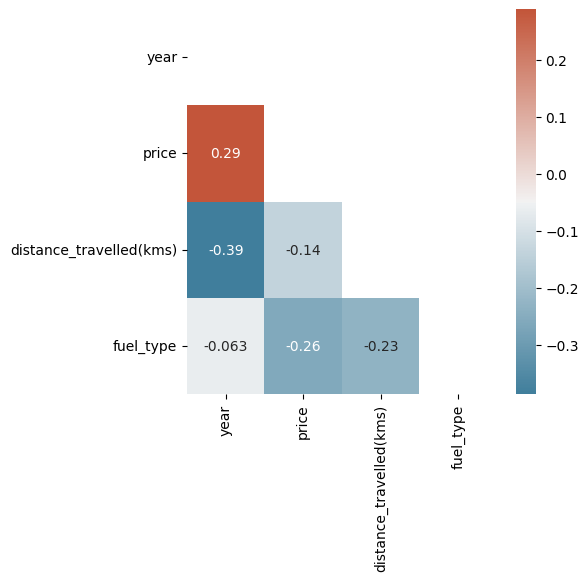

In [156]:
cols = ['brand','full_model_name','model_name','city','brand_rank','car_age','distance below 30k km','new and less used','inv_car_price','inv_car_dist','inv_car_age','inv_brand','std_invprice','std_invdistance_travelled','std_invrank','best_buy1','best_buy2',]
get_heat_map_corr( df_tmp,figsize=(5,5) ,remove_cols=[cols] )
# df.columns

In [157]:
# looking into *inv* columns
df.columns
df[['year','full_model_name','model_name','price','distance_travelled(kms)','car_age','inv_car_price','inv_car_dist','inv_car_age','inv_brand','std_invprice','std_invdistance_travelled','std_invrank','best_buy1','best_buy2',]
]

,year,full_model_name,model_name,price,distance_travelled(kms),car_age,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,2016,Honda Brio S MT,Brio,425000.0,9680.0,5.0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.000000
1,2012,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,9.0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.000000
2,2017,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,4.0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.000000
3,2017,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,4.0,2.383790e-07,0.000040,0.250000,0.500000,0.010692,0.013563,0.493750,71.604306,71.604306
4,2012,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,9.0,2.105263e-06,0.000042,0.111111,0.071429,0.127871,0.014269,0.059821,109.150857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,2015,Hyundai Eon Era +,Eon,290000.0,38000.0,6.0,3.448276e-06,0.000026,0.166667,0.071429,0.212168,0.008771,0.059821,111.327773,0.000000
1721,2011,Bentley Continental Flying Spur W12,Continental,7500000.0,36000.0,10.0,1.333333e-07,0.000028,0.100000,0.022727,0.004099,0.009283,0.010511,0.399987,0.000000
1722,2008,Mahindra-Renault Logan DLE 1.5 dci,Logan,185000.0,142522.0,13.0,5.405405e-06,0.000007,0.076923,0.041667,0.335011,0.002014,0.029687,20.026662,0.000000
1723,1990,Mahindra Jeep CJ 500 D,Jeep,325000.0,18581.0,31.0,3.076923e-06,0.000054,0.032258,0.041667,0.188859,0.018402,0.029687,103.172958,0.000000


In [158]:
# delete dublicates
df.duplicated().sum()
print(df.shape)
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()
print(df.shape)

(1725, 21)
(1300, 21)


<Axes: ylabel='brand'>

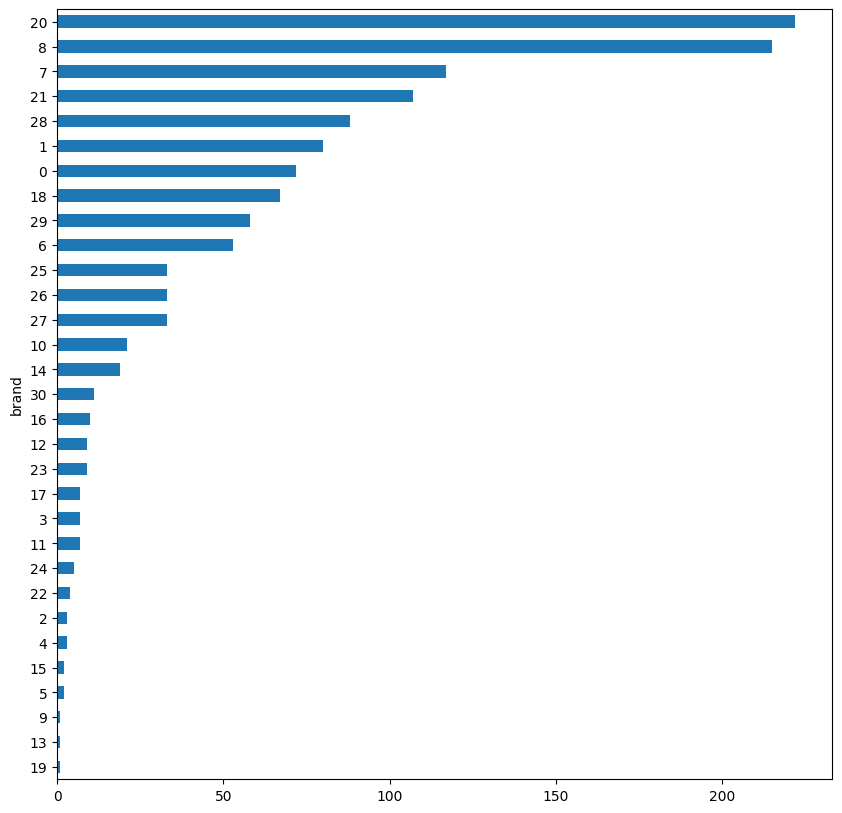

In [181]:
# plot top cars
df['brand'].value_counts().sort_values().plot(kind='barh', figsize=(10,10))

<Axes: ylabel='Frequency'>

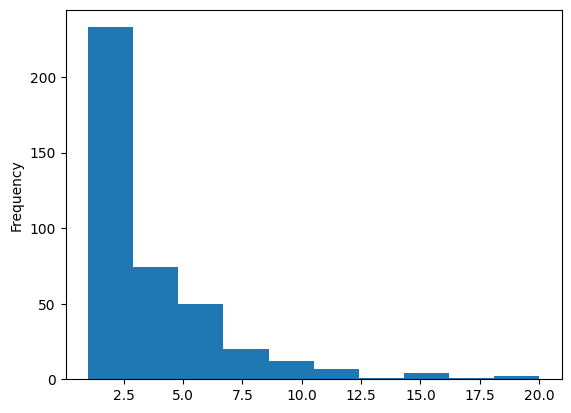

In [183]:
# plot hist of price
df['price'].value_counts().plot(kind='hist')

<BarContainer object of 15 artists>

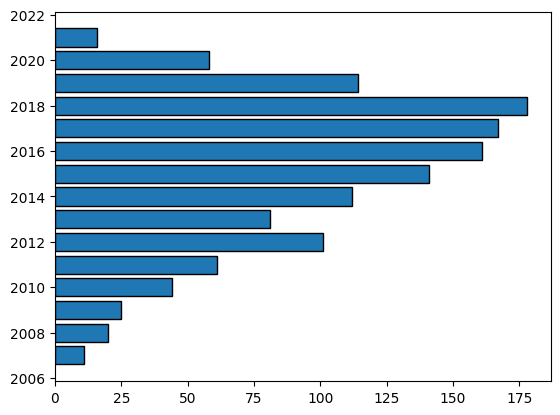

In [185]:
# plot years 
# df['year'].value_counts().plot(kind='hist')
top_print = 15
plt.barh( df['year'].value_counts()[:top_print].index, df['year'].value_counts()[:top_print], edgecolor='black' )
# df['year'].value_counts()[:top_print]

In [162]:
df[["year", 'car_age', 'inv_car_age']]
df.columns

Index(['year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank', 'car_age',
       'distance below 30k km', 'new and less used', 'inv_car_price',
       'inv_car_dist', 'inv_car_age', 'inv_brand', 'std_invprice',
       'std_invdistance_travelled', 'std_invrank', 'best_buy1', 'best_buy2'],
      dtype='object')

In [163]:
df['car_age'] = df['car_age'].astype(int)
# df['car_age'] .value_counts()

Text(0, 0.5, 'millage')

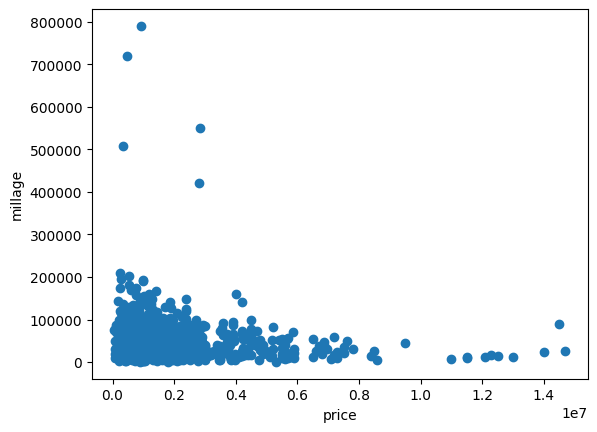

In [164]:
plt.scatter(df['price'], df['distance_travelled(kms)'] )
plt.xlabel("price")
plt.ylabel("millage")

### linear regression

In [165]:
label = LabelEncoder()

cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode

for c in cols_to_encode:
    label.fit(df[c].drop_duplicates())
    df[c] = label.transform(df[c])
    # print(c, df[c].isnull().sum())

df.head(2)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,2016,7,131,28,425000.0,9680.0,3,9,7,5,1,0,0.000002,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.0
1,2012,23,570,129,325000.0,119120.0,1,9,11,9,0,0,0.000003,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.0


In [166]:
# get X and delete columns I don't understand what they do
X = df.drop('price',axis=1)
X.head(0)
drop_cols = ['inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand', 'std_invprice', 'std_invdistance_travelled', 'std_invrank', 'best_buy1', 'best_buy2']
X = X.drop(drop_cols,axis=1)

In [167]:
X.head(0)

,year,brand,full_model_name,model_name,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used


In [168]:
y = df['price'].to_numpy()

In [169]:
# X = X.to_numpy()
print(X.shape)
print(y.shape)

(1300, 11)
(1300,)


In [170]:
# finding column with infinite value
for i in X.columns:
    inf = np.isinf(X[i]).values.sum()
    if inf != 0:
        print(inf, i)

In [171]:
# X["inv_car_age"].replace([np.inf, -np.inf], 0, inplace=True)
# X["inv_car_age"].value_counts()

In [186]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_s = sc.fit(X)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
# # X_train


LinearRegression()

In [174]:
lin_model.coef_

array([ 5.46769820e+04, -3.12080235e+05,  1.28996882e+04, -6.71819465e+03,
       -1.18904576e+00, -4.71199495e+05, -1.64239637e+04, -2.38247702e+03,
       -5.46769820e+04,  6.25290818e+05,  1.21744497e+05])

In [175]:
lin_model.score(X_test,y_test)

0.27454712364998857

In [176]:
lin_model.predict(X_test)
lin_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [177]:
# get sorted coef_ 
data = {}
for indx, col_name in enumerate(X_train):
    # print(col_name, lin_model.coef_[indx])
    # print(col_name, indx, lin_model.coef_[indx])
    data[col_name] = lin_model.coef_[indx]
data = dict(sorted(data.items(), key=lambda x: x[1],reverse=True))
data

{'distance below 30k km': 625290.8180299953,
 'new and less used': 121744.49737470187,
 'year': 54676.982001393575,
 'full_model_name': 12899.688243674831,
 'distance_travelled(kms)': -1.1890457596746273,
 'brand_rank': -2382.4770194187313,
 'model_name': -6718.194653158156,
 'city': -16423.963742128883,
 'car_age': -54676.98200139111,
 'brand': -312080.23458355246,
 'fuel_type': -471199.4953218377}

(1040,)
(1040,)


0.25716173553772514

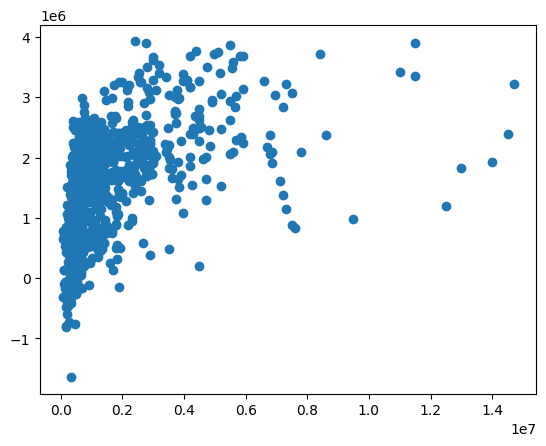

In [178]:
y_pred_train = lin_model.predict(X_train)
plt.scatter(y_train, y_pred_train)
print(y_train.shape)
print(y_pred_train.shape)
r2_score(y_train, y_pred_train)

0.27454712364998857

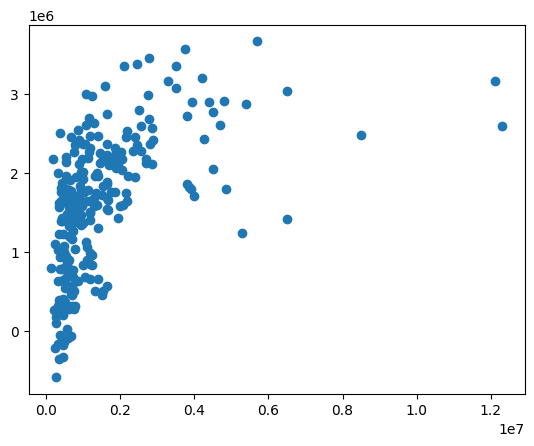

In [179]:
y_pred_test = lin_model.predict(X_test)
plt.scatter(y_test, y_pred_test)
r2_score(y_test, y_pred_test)

In [180]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)
forest.score(X_train,y_train)

0.9557408406166469